# Problem 1 (b) -- (e)

This solution uses the demo code on Canvas.

We start by defining the 2-D quadratic function and its gradient as a function of the parameters L,m.

In [1]:
L = 1
m = 0.1
def f(x,y):
    return 0.5*L*x**2 + 0.5*m*y**2

def Grad_f(x,y):
    g1 = L*x
    g2 = m*y
    return np.array([g1,g2])


# b)

Next, we will define and implement the gradient descent algorithm with the step size and initialization as specified in the problem.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from mpl_toolkits import mplot3d

def Gradient_Descent(Grad,x0,y0, gamma = 0.00125, epsilon=0.0001, max_iter=100000):
    """
    We are going to code up a basic implementation of gradient descent for a 2D
    function. The variables (x, y) represent the x and y axes, i.e., the
    two variables on which the quadratic is defined. Grad is the gradient, defined
    as a function of two variables.
    
    IMPORTANT: epsilon here is NOT the distance to optimal solution. If is the amount of
    progress made between iterations is less than epsilon, this presents a stopping criterion.
    
    Outputs: (final_iter, iterates_x, iterates_y, number_iterations)
    """
    
    #Initialization is given by (x0, y0)
    x, y = x0, y0
    i = 0

    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error_red = 10 #Measures reduction of error over iterations. Make sure this is greater than epsilon
    X = np.array([x,y])
    
    
    #Looping as long as error is greater than epsilon; max_iter ensures you don't go on forever
    while np.linalg.norm(error_red) > epsilon and i < max_iter:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        
        X_prev = X
        X = X - gamma * Grad(x,y)
        error_red = X - X_prev
        x,y = X[0], X[1]
          
    return X, iter_x,iter_y, iter_count


gamma = 2/(L + m)

#Gradient descent from init (20,20)
final_iter, iter_x, iter_y, iter_count = Gradient_Descent(Grad_f,20,20,gamma,epsilon=0,max_iter=100) 
print(iter_count[-1])

100.0


We will now plot the progress of $100$ iterations of gradient descent on this function. The code below produces both a 3D surface plot and a contour plot. We will now plot the progress of gradient descent on this function. The code below produces both a 3D surface plot and a contour plot. Again, you only need to produce a contour plot for full credit; the surface plot is just to provide an additional visualization.

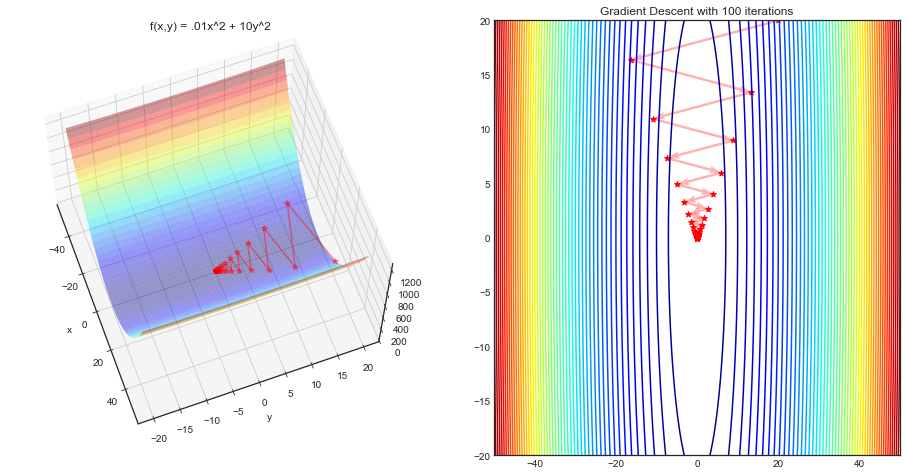

In [3]:
x = np.linspace(-50,50,250)
y = np.linspace(-20,20,250)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, f(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)
ax.set_title('f(x,y) = .01x^2 + 10y^2')


ax.view_init(65, 340)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))

plt.show()

As you can see here, the function is very "flat" along one of the directions, and has a very large condition number. Gradient descent very quickly minimizes the function along the y-direction due to the curvature, but takes a very long time to minimize along the x-direction since it keeps bouncing around making very little progress. 

Let us now see what happens with the momentum method. We start by defining gradient descent with momentum.

In [4]:
#code for momentum
def Gradient_Descent_Momentum(Grad,x0,y0, gamma = 0.00125, theta = 0.01, epsilon=0.0001, max_iter=100000):
    """
    We are going to code up a basic implementation of gradient descent for a 2D
    function. The variables (x, y) represent the x and y axes, i.e., the
    two variables on which the quadratic is defined. Grad is the gradient, defined
    as a function of two variables.
    
    IMPORTANT: epsilon here is NOT the distance to optimal solution. If is the amount of
    progress made between iterations is less than epsilon, this presents a stopping criterion.
    
    Outputs: (final_iter, iterates_x, iterates_y, number_iterations)
    """
    
    #Initialization is given by (x0, y0)
    x, y = x0, y0
    i = 0

    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error_red = 10 #Measures reduction of error over iterations. Make sure this is greater than epsilon
    X = np.array([x,y])
    X_prev = X
    X_prev2 = X
    
    #Looping as long as error is greater than epsilon; max_iter ensures you don't go on forever
    while np.linalg.norm(error_red) > epsilon and i < max_iter:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        
        X_prev2 = X_prev
        X_prev = X
        X = X - gamma * Grad(x,y) + theta*(X - X_prev2)
        error_red = X - X_prev
        x,y = X[0], X[1]
          
    return X, iter_x,iter_y, iter_count

gamma = 4/(np.sqrt(L) + np.sqrt(m))**2
kappa = L/m
theta = ((np.sqrt(kappa) - 1)/(np.sqrt(kappa) + 1))**2
final_iter, iter_x, iter_y, iter_count = Gradient_Descent_Momentum(Grad_f,20,20,gamma,theta,epsilon=0,max_iter=100) 
print(iter_count[-1])

100.0


We will now plot the progress of gradient descent with momentum on this function. The code below produces both a 3D surface plot and a contour plot. Again, you only need to produce a contour plot for full credit; the surface plot is just to provide an additional visualization.

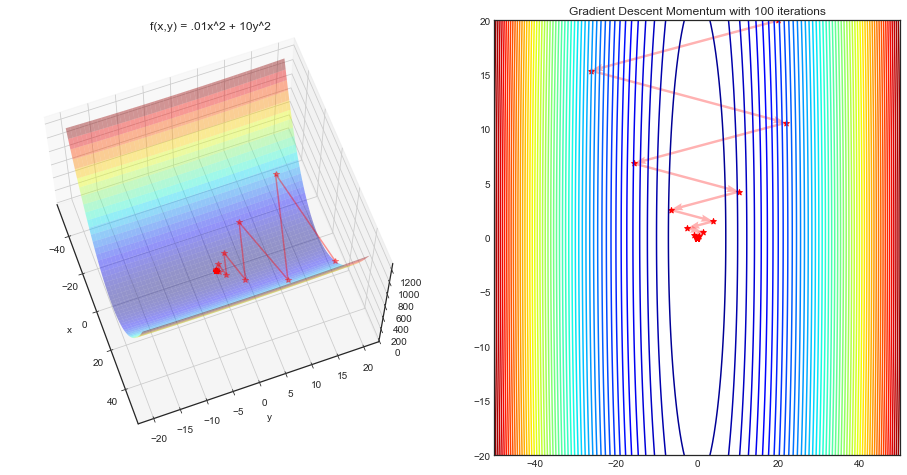

In [5]:
#Making contour plot for momentum
x = np.linspace(-50,50,250)
y = np.linspace(-20,20,250)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, f(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)
ax.set_title('f(x,y) = .01x^2 + 10y^2')


ax.view_init(65, 340)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent Momentum with {} iterations'.format(len(iter_count)))

plt.show()

Observe that adding momentum leads to the gradient descent algorithm making much more progress in the first 100 iterations. We will now explore this further.

# c): Find number of iterations for both gradient descent and momentum, such that squared l2-norm of error is at most epsilon.

We will start with the value of squared l2-norm of error = 0.01.

In [6]:
epsilon = np.sqrt(1e-2)
#Parameters for GD
L = 1
m = 0.1
gamma = 2/(L + m)

final_iter, iter_x, iter_y, iter_count = Gradient_Descent(Grad_f,20,20,gamma, epsilon=epsilon) 
print("Number of iterations for GD to converge: %d"%iter_count[-1])

#Parameters for momentum
gamma = 4/(np.sqrt(L) + np.sqrt(m))**2
kappa = L/m
theta = ((np.sqrt(kappa) - 1)/(np.sqrt(kappa) + 1))**2
final_iter, iter_x, iter_y, iter_count_momentum = Gradient_Descent_Momentum(Grad_f,20,20,gamma,theta, epsilon=epsilon) 
print("Number of iterations for GD with momentum to converge: %d"%iter_count_momentum[-1])

Number of iterations for GD to converge: 31
Number of iterations for GD with momentum to converge: 15


Observe that momentum takes far fewer iterations to converge. This is consistent with our observation from part b). 

We will now consider the number of iterations to converge to squared l2-norm of error = 0.0001. This number will naturally increase for both GD and momentum, as the requirement is now more stringent.

In [7]:
epsilon = np.sqrt(1e-4)
#Parameters for GD
L = 1
m = 0.1
gamma = 2/(L + m)

#Gradient descent from init (-2, -2) with stepsize 0.01
final_iter, iter_x, iter_y, iter_count = Gradient_Descent(Grad_f,20,20,gamma, epsilon=epsilon) 
print("Number of iterations for GD to converge: %d"%iter_count[-1])

#Parameters for momentum
gamma = 4/(np.sqrt(L) + np.sqrt(m))**2
kappa = L/m
theta = ((np.sqrt(kappa) - 1)/(np.sqrt(kappa) + 1))**2
final_iter, iter_x, iter_y, iter_count_momentum = Gradient_Descent_Momentum(Grad_f,20,20,gamma,theta, epsilon=epsilon) 
print("Number of iterations for GD with momentum to converge: %d"%iter_count_momentum[-1])

Number of iterations for GD to converge: 42
Number of iterations for GD with momentum to converge: 19


Observe that, again, momentum takes far fewer iterations to converge. It is a reasonable hypothesis to make that if the condition number ($\kappa = L/m$) of the problem keeps increasing, this disparity between momentum and GD will only widen. We will explore this in the next part of the problem.

As mentioned on Piazza, you will get 75 percent of the credit on this problem if you interpreted convergence in the squared L2 norm as convergence in the L2 norm.

# d): plot number of iterations v.s. condition number for both GD and momentum method.

As directed in the question, we select m = 1 and vary L to vary the condition number.
We specify squared-l2-norm tolerance epsilon = 0.001 and plot the number of iterations required to converge for both algorithms as a function of L.

In [8]:
Ls = np.array([1,4,16,64,256])
Ks_GD = np.zeros(5)
Ks_momentum = np.zeros(5)

m = 1
epsilon = np.sqrt(1e-3)

for i in range(5):
    L = Ls[i]
    
    def fL(x,y):
        return 0.5*L*x**2 + 0.5*y**2

    def Grad_fL(x,y):
        g1 = L*x
        g2 = y
        return np.array([g1,g2])
    
    #Gradient descent from (20,20)
    gamma = 2/(L + m)
    final_iter, iter_x, iter_y, iter_count = Gradient_Descent(Grad_f,20,20,gamma, epsilon=epsilon) 
    print(iter_count[-1])
    Ks_GD[i] = iter_count[-1]

    #Momentum from (20,20)
    gamma = 4/(np.sqrt(L) + np.sqrt(m))**2
    kappa = L/m
    theta = ((np.sqrt(kappa) - 1)/(np.sqrt(kappa) + 1))**2
    final_iter, iter_x, iter_y, iter_count_momentum = Gradient_Descent_Momentum(Grad_f,20,20,gamma,theta, epsilon=epsilon) 
    print(iter_count_momentum[-1])
    Ks_momentum[i] = iter_count_momentum[-1]
    
    
print(Ks_GD)
print(Ks_momentum)

2.0
2.0
15.0
10.0
58.0
22.0
230.0
47.0
915.0
100.0
[  2.  15.  58. 230. 915.]
[  2.  10.  22.  47. 100.]


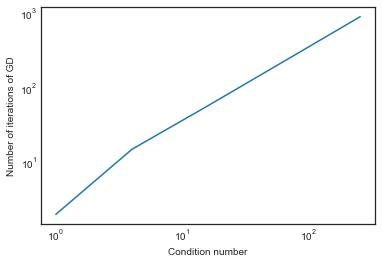

In [9]:
plt.loglog(Ls, Ks_GD)
plt.xlabel("Condition number")
plt.ylabel("Number of iterations of GD")
#plt.ylim(0,max(Ks_GD))
plt.show()

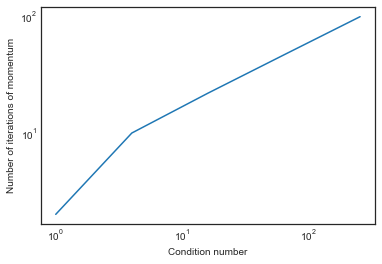

In [10]:
plt.loglog(Ls,Ks_momentum)
plt.xlabel("Condition number")
plt.ylabel("Number of iterations of momentum")
#plt.ylim(0,max(Ks_GD))
plt.show()

Observe from the above that both plots have a roughly linear relationship between the *log* of the number of iterations required to converge and the *log* of the condition number.
The slope of these lines, if equal to $\beta$, will thus tell us that $\text{number of iterations} \sim \kappa^{\beta}$.
We now approximately calculate the slope of each line by doing a simple linear regression.

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.log(Ls).reshape(-1,1), np.log(Ks_GD))
print("Slope of line for GD = %.3f"%reg.coef_[0])

Slope of line for GD = 1.081


In [12]:
reg = LinearRegression().fit(np.log(Ls).reshape(-1,1), np.log(Ks_momentum))
print("Slope of line for momentum = %.3f"%reg.coef_)

Slope of line for momentum = 0.676


Observe that GD has a slope approximately equal to $1$, and momentum has a slope approximately equal to $0.67$. It turns out that the true value of this slope is equal to $0.5$; you might see this if you chose larger values of $\kappa$ and/or a lower error tolerance. You will get full credit for any value of the slope for momentum that is significantly smaller than that of GD.

# Part (e)

From the above, you see that the number of iterations it takes for GD to converge to an $\epsilon$ neighborhood scales linearly in the condition number, as expected (since the slope is equal to $1$). You also saw that momentum resulted in a smaller slope: in theory, this is supposed to be $1/2$ but you are seeing some finite-size effects above since $\epsilon$ is not arbitrarily small. According to our plot above, we will "guess" that it takes $O(\kappa^{2/3} \log (\| w_0 - w^* \|_2^2 / \epsilon))$ to converge to an $\epsilon$-optimal solution. Any exponent between $0.4$ and $0.8$ will be accepted for full credit; the key takeaway is that it is less than $1$.